# librarys

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
%matplotlib inline 

# data load

In [3]:
def data_load():
    data = pd.read_csv('googleplaystore.csv')
    return data 

data = data_load()

# data summarize

In [4]:
def print_summarize_dataset(dataset):
    print('data dimenshiniel')
    print(data.shape)
    print('first 10 datasets')
    print(data.head(10))
    print('statistik summurize')
    print(data.describe())

print_summarize_dataset(data)

data dimenshiniel
(10841, 13)
first 10 datasets
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   

In [39]:
data['Rating'].sample(10)

5679     4.0
3406     4.1
1080     4.5
9374     3.4
6560     NaN
5617     4.4
10005    4.2
4363     3.5
9946     2.3
5103     4.7
Name: Rating, dtype: float64

In [40]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# data clean

In [5]:
def clean_dataset(data):
    data.dropna(axis=0, inplace=True)
    data["Reviews"] = data["Reviews"].astype(np.int32)
    data["Category"] = data["Category"].astype("string")
    data["Installs"] = data["Installs"].str.replace("+", '').str.replace(",", '').astype(int)
    data["Price"] = data["Price"].str.replace("$", '').astype(np.float32)
    data["Last Updated"] = pd.to_datetime(data['Last Updated'])
    data["Genres"] = data["Genres"].str.replace("&", "and").astype("string")
    data["Size"] = data["Size"].str.replace("Varies with device", "NaN")
    data_size = data[data["Size"].str.contains("k", regex=False)]
    data_size["Size"] = data_size["Size"].str.replace("k", '').astype(float)/1000
    data["Size"].update(data_size["Size"])
    data['Size'] = data["Size"].str.replace("M", '').astype(float)
    data["Size"] = data["Size"].fillna(np.mean(data["Size"]))
    data["Content Rating"] = data["Content Rating"].str.replace("+", "")
    return data
clean_dataset = clean_dataset(data)

/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_25369/1211195194.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = data["Installs"].str.replace("+", '').str.replace(",", '').astype(int)
/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_25369/1211195194.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Price"] = data["Price"].str.replace("$", '').astype(np.float32)
/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_25369/1211195194.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [6]:
clean_dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# vizualization

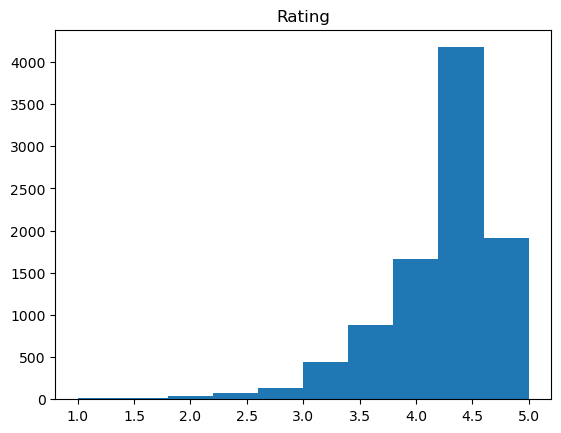

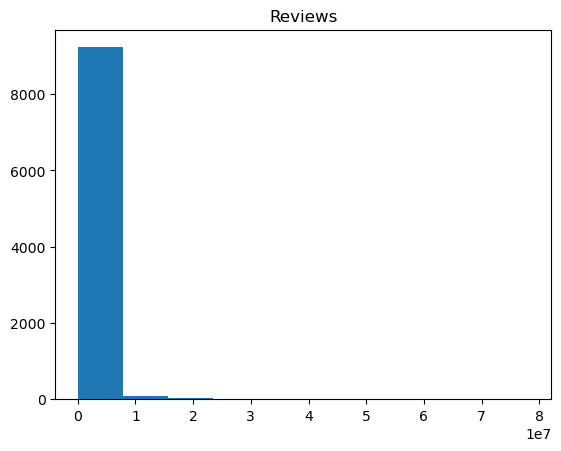

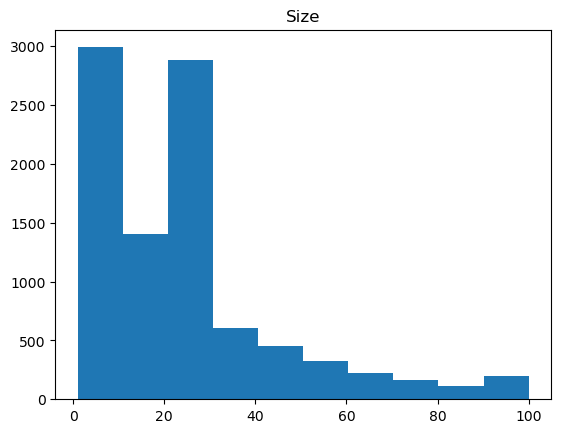

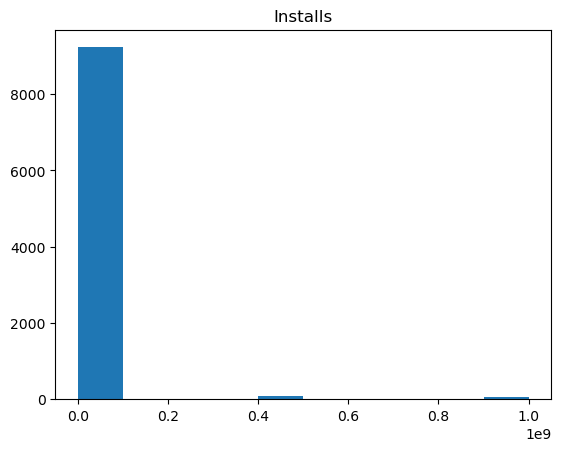

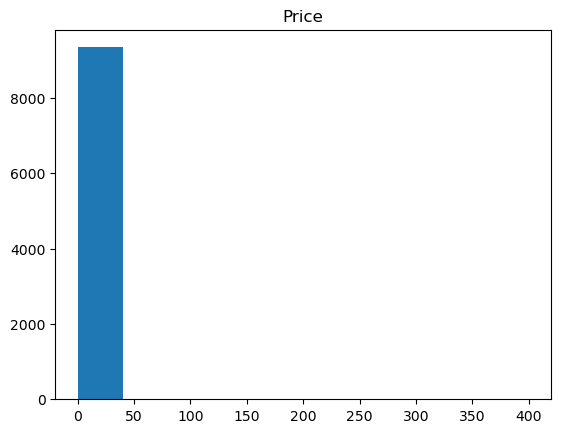

In [7]:
def print_histogram(dataset):

  plt.title("Rating")
  plt.hist(dataset["Rating"])
  plt.show()
  plt.title("Reviews")
  plt.hist(dataset["Reviews"])
  plt.show()
  plt.title("Size")
  plt.hist(dataset["Size"])
  plt.show()
  plt.title("Installs")
  plt.hist(dataset["Installs"])
  plt.show()
  plt.title("Price")
  plt.hist(dataset["Price"])
  plt.show()

print_histogram(clean_dataset)

In [8]:
def my_area(clean_dataset):
  fig = px.area(clean_dataset["Category"], facet_col=clean_dataset["Rating"], facet_col_wrap=8, title="Category Rating")
  fig.show()
my_area(clean_dataset)

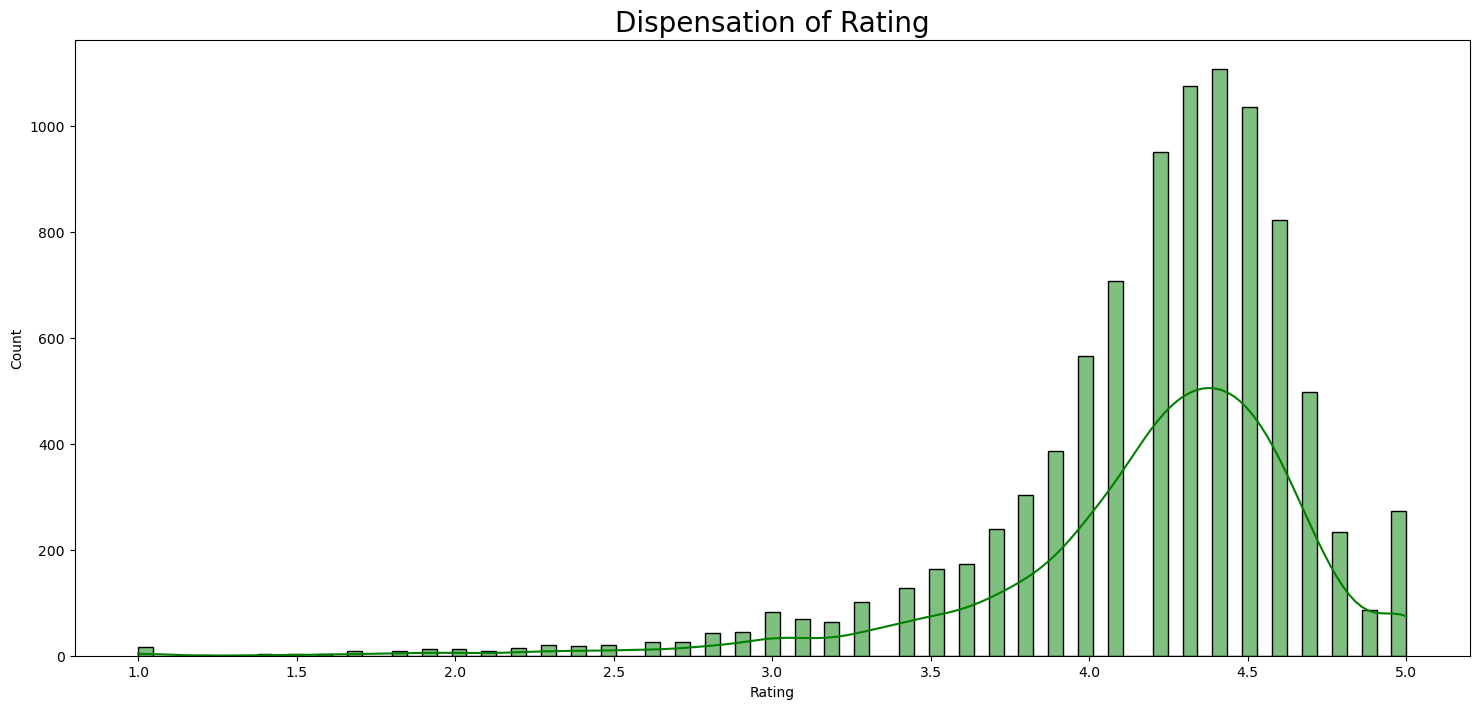

In [9]:
def freq_of_ratings(dataset):
    plt.figure(figsize = (18, 8))
    plt.title('Dispensation of Rating', fontsize=20)
    sns.histplot(data=dataset, x="Rating", kde=True, color= "green")
    plt.show()

freq_of_ratings(clean_dataset)

In [10]:
clean_dataset.corr()

/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_25369/2542021943.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068133,0.071408,0.051337,-0.021919
Reviews,0.068133,1.000000,0.128713,0.641605,-0.009824
Size,0.071408,0.128713,1.000000,0.079895,-0.024588
Installs,0.051337,0.641605,0.079895,1.000000,-0.011895
Price,-0.021919,-0.009824,-0.024588,-0.011895,1.000000


/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_25369/2683141429.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



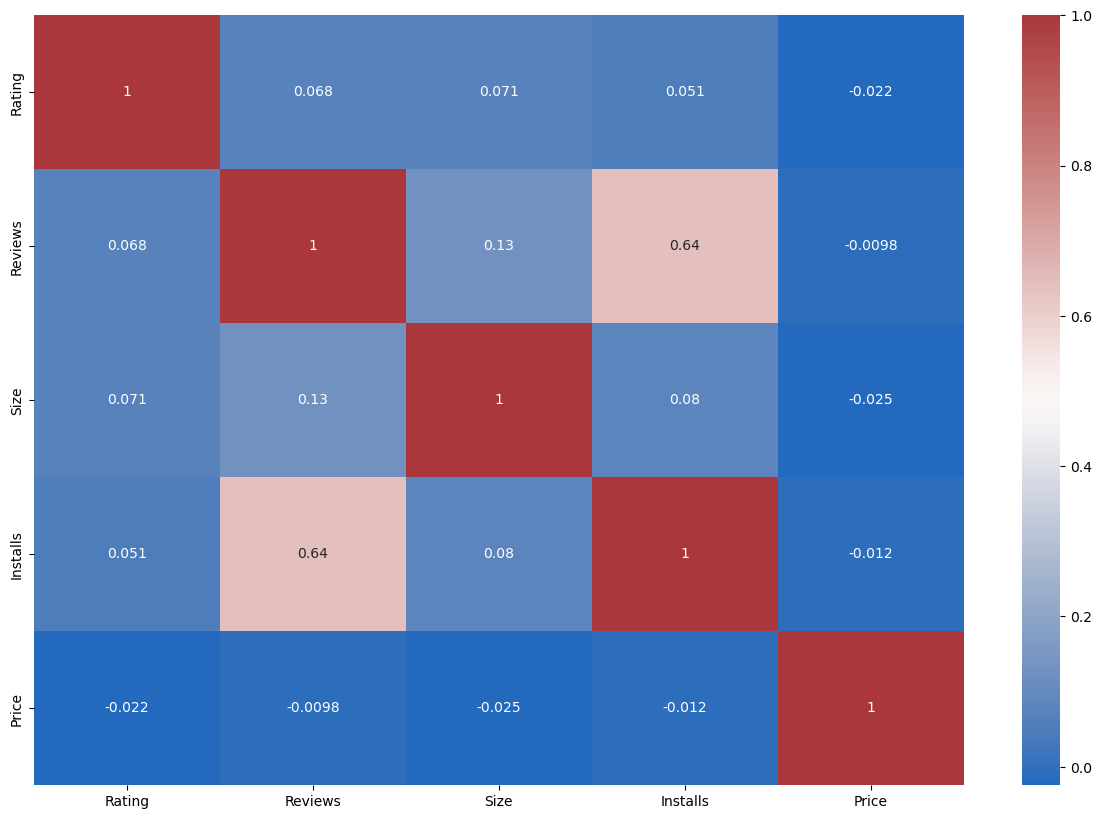

In [11]:
def compute_correlations_matrix(dataset):
    corrMatrix = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(corrMatrix, annot=True, cmap='vlag')
    plt.show()

compute_correlations_matrix(clean_dataset)

# machina learning 

In [13]:
import sklearn
from sklearn.model_selection import train_test_split 

In [47]:
num_data = clean_dataset[["Rating", "Reviews", "Size", "Installs","Price"]]


In [48]:
num_data['price_size'] = clean_dataset['Price']/clean_dataset['Size']
num_data['installs_rating'] = clean_dataset['Installs']/clean_dataset['Rating']
num_data['review_rating'] = clean_dataset['Reviews']/clean_dataset['Rating']
num_data['size_rating'] = clean_dataset['Reviews']/clean_dataset['Rating']

/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_25369/1151918984.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_25369/1151918984.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5r/8qsc7qzj04g73js6m7szr_7h0000gn/T/ipykernel_25369/1151918984.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [49]:
num_data

,Rating,Reviews,Size,Installs,Price,price_size,installs_rating,review_rating,size_rating
0,4.1,159,19.000000,10000,0.0,0.0,2.439024e+03,38.780488,38.780488
1,3.9,967,14.000000,500000,0.0,0.0,1.282051e+05,247.948718,247.948718
2,4.7,87510,8.700000,5000000,0.0,0.0,1.063830e+06,18619.148936,18619.148936
3,4.5,215644,25.000000,50000000,0.0,0.0,1.111111e+07,47920.888889,47920.888889
4,4.3,967,2.800000,100000,0.0,0.0,2.325581e+04,224.883721,224.883721
...,...,...,...,...,...,...,...,...,...
10834,4.0,7,2.600000,500,0.0,0.0,1.250000e+02,1.750000,1.750000
10836,4.5,38,53.000000,5000,0.0,0.0,1.111111e+03,8.444444,8.444444
10837,5.0,4,3.600000,100,0.0,0.0,2.000000e+01,0.800000,0.800000
10839,4.5,114,23.746317,1000,0.0,0.0,2.222222e+02,25.333333,25.333333


In [57]:
num_data.corrwith(num_data['Installs']).sort_values(ascending=False)

Installs           1.000000
installs_rating    0.998753
review_rating      0.645035
size_rating        0.645035
Reviews            0.641605
Size               0.079895
Rating             0.051337
price_size        -0.008135
Price             -0.011895
dtype: float64

In [58]:
x = num_data.drop('Installs', axis=1)
y = num_data['Installs']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [59]:
from sklearn.ensemble import BaggingRegressor

beg_reg = BaggingRegressor(n_estimators=10)
beg_reg.fit(x_train,y_train)

BaggingRegressor()

In [60]:
beg_reg.score(x_test,y_test)*100

99.99999999936875

In [52]:
x_train

,Rating,Reviews,Size,Installs,price_size,installs_rating,review_rating,size_rating
10046,2.9,33,23.746317,1000,0.210138,3.448276e+02,1.137931e+01,1.137931e+01
8186,4.2,419375,31.000000,10000000,0.000000,2.380952e+06,9.985119e+04,9.985119e+04
3882,3.9,730,6.300000,10000,0.000000,2.564103e+03,1.871795e+02,1.871795e+02
1452,4.0,6000,18.000000,1000000,0.000000,2.500000e+05,1.500000e+03,1.500000e+03
7662,4.4,102215,42.000000,1000000,0.000000,2.272727e+05,2.323068e+04,2.323068e+04
...,...,...,...,...,...,...,...,...
8930,3.6,5692,31.000000,1000000,0.000000,2.777778e+05,1.581111e+03,1.581111e+03
10641,4.5,3320,14.000000,100000,0.000000,2.222222e+04,7.377778e+02,7.377778e+02
5077,4.4,4931562,23.746317,100000000,0.000000,2.272727e+07,1.120810e+06,1.120810e+06
3407,4.2,37237,3.900000,5000000,0.000000,1.190476e+06,8.865952e+03,8.865952e+03


In [53]:
y_train

10046    4.99
8186     0.00
3882     0.00
1452     0.00
7662     0.00
         ... 
8930     0.00
10641    0.00
5077     0.00
3407     0.00
2873     0.00
Name: Price, Length: 7488, dtype: float32

In [55]:
from sklearn.ensemble import BaggingRegressor

beg_reg = BaggingRegressor(n_estimators=10)
beg_reg.fit(x_train,y_train)

BaggingRegressor()

In [56]:
beg_reg.score(x_test,y_test)*100

71.08137558831325

# simple regressor

In [28]:
clean_dataset['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [31]:
x = clean_dataset[['Rating']]
y = clean_dataset['Installs']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)*100

19.65811965811966